# Static Replication, Volatility Derivatives and Implied Risk-Neutral Distributions

[Slides](../slides/sl2_static.html)

[Videos](../media/v2_static.html)

[Breeden and Litzenberger (1978)](../readings/r3_breeden1978.html)

[Demeterfi and al. (1999)](../readings/r2_demeterfi1999.html)


## Implied Risk-Neutral Distributions

In [Breeden and Litzenberger (1978)](../readings/r3_breeden1978.html), we have seen an intuitive proof 
through discretization of the fundamental results:

- The knowledge of European vanilla call (and put) options 
$$c(K,T), \forall K, \forall T$$ 
is equivalent to the knowledge of the risk-neutral probability distribution of $S_T, \forall T$

- The risk-neutral probability density function for $T$ is given by
$$\psi_T(K) = \frac{1}{B(0,T)} \frac{\partial^2 c}{\partial^2 K}$$

where $B(0,T)$ is the price of the zero-coupon bond for maturity $T$.

If we know the terminal risk-neutral density $\psi_T(x)$ then for all $K$ and $T$ we have
$$C_0(K,T) = B(0,T) \int_0^{\infty} (x-K)^+ \psi_T(x)dx = B(0,T) \int_K^{\infty} (x-K) \psi_T(x)dx$$
hence
$$C_0(K,T)=B(0,T) \left[ \int_K^{\infty} x \psi_T(x)dx - K \int_K^{\infty} \psi_T(x)dx \right]$$

Since we observe market quotes, thus we know the value of the above integral for all K
and $T$. Since the integrals are functions of $K$, we proceed by differentiating with respect to $K$.

$$\frac{\partial}{\partial K}\int_K^{\infty} x \psi_T(x)dx = -K \psi_T(K)$$

For the second term
$$\frac{\partial}{\partial K} \left( K \int_K^{\infty} \psi_T(x)dx\right) = \int_K^{\infty} \psi_T(x)dx + K \frac{\partial}{\partial K}\int_K^{\infty} \psi_T(x)dx $$
hence
$$\frac{\partial}{\partial K} \left( K \int_K^{\infty} \psi_T(x)dx\right) = \int_K^{\infty} \psi_T(x)dx - K \psi_T(K)$$

Thus we can conclude
$$\frac{\partial C}{\partial K} = - B(0,T) \int_K^{\infty} \psi_T(x)dx$$

Differentiating again with respect to $K$, we obtain
$$\psi_T(K) = \frac{1}{B(0,T)}\frac{\partial^2 C}{\partial^2 K}$$

### Conclusion

For all payoff functions $H(x)$ that only depend on terminal value of the underlying $S_T$ ,
valuation can be done using
$$B(0,T) \int H(x) \psi_T(x) dx $$
where the risk-neutral density $\psi_T(x)$ can be deduced from the vanillas using 
$$\psi_T(K) = \frac{1}{B(0,T)}\frac{\partial^2 C}{\partial^2 K}$$

For example the digital put can be valued as 
$$B(0,T) \int_0^K \psi_T(x) dx = B(0,T) \mathbf{Q}[S_T < K]=\frac{\partial P}{\partial K}$$

## Static replication with vanilla options

In [assignment 1](../assignments/a1.html), we have seen you have seen how a collar payoff 
can be created from Vanilla options, and how digital options can be approximated with a call spread.

In [Breeden and Litzenberger (1978)](../readings/r3_breeden1978.html), we have also seen how
a primitive security payoff is obtained from a butterfly spread.

In [Demeterfi and al. (1999)](../readings/r2_demeterfi1999.html), we saw how the log payoff 
and variance swaps can be replicated with vanilla options. 

### Generalized payoffs

It is in fact possible to use combinations of options to replicate arbitrary payoffs at
a fixed expiration. To see how, it is enough to realize that you can approximate the payoff of
an arbitrary derivative contract at expiration $T$ by a piecewise-linear function of the terminal
value of the stock price $S_T$ as defined by its intercept $\beta$ and the slopes $\alpha_i$ of
each successive linear piece.  For example,

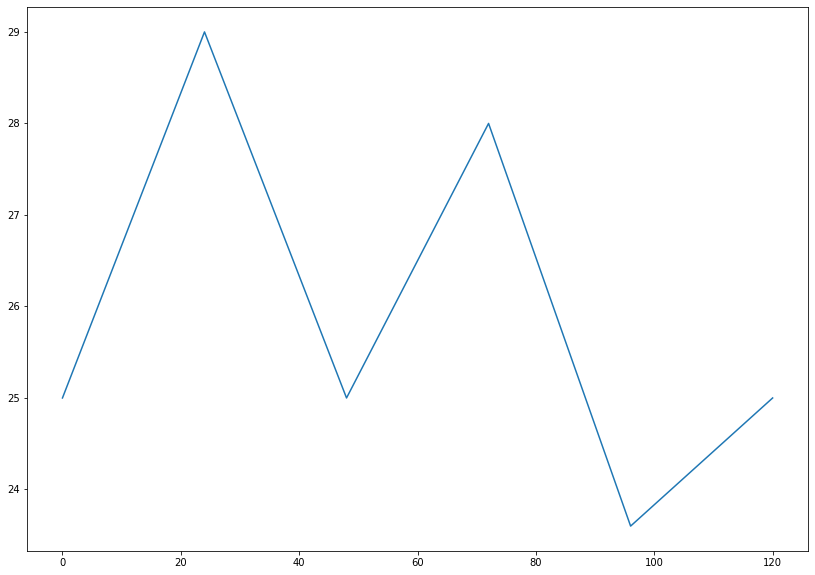

In [1]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
plt.rcParams['figure.figsize'] = (14,10)

beta = 25
Ks = np.array([20, 40, 60, 80, 100, 120])
slopes = np.array([0.3, -0.5, 0.5, -0.25, -0.15, 0.1, -0.15])
W = slopes[1:]-slopes[:-1]
S = np.linspace(0, 120, 6)
payoffs = np.empty_like(S)

for i,s in enumerate(S):
    payoffs[i] = beta + slopes[0] * s + np.dot(W, np.maximum(s-Ks, 0))

plt.figure()
plt.plot(S, payoffs)
plt.show()

This function is the payoff of a portfolio consisting of riskless bonds with face value $\beta$, 
some stocks, and a series of call options with successively higher strikes $K_i$. 

To see that, note that at expiration $T$, if the stock price ends up between 
$K_j$ and $K_{j+1}$, then all the calls with strike higher than $K_j$ expire worthless 
and the payoff is given by 
$$\beta + \alpha_0 S_T + (\alpha_1 - \alpha_0)(S_T - K_0) + \ldots + (\alpha_{j+1} - \alpha_j)(S_T - K_j)$$
which can be simplified into
$$\beta + \alpha_0 K_0 + (\alpha_1 - \alpha_0)(K_1 - K_0) + \ldots + \alpha_j (K_j - K_{j-1}) + \alpha_{j+1} (S_T - K_j)$$
This expression is consistent with the piecewise-linear payoff assumption.


In the experiment below, we can see how arbitrary payoff functions can be approximated 
with this approach as long as we can find calls with arbitrary strikes.

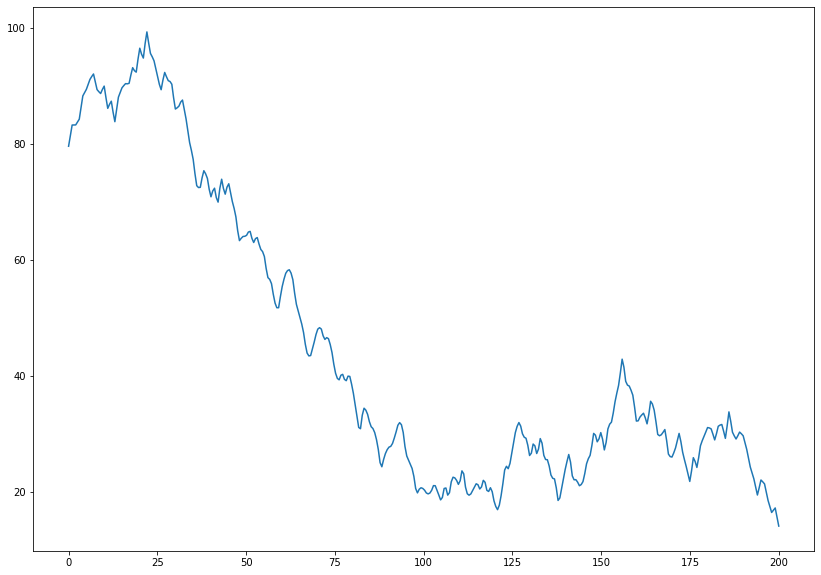

In [2]:
I = 100 * (np.random.random() + np.random.random())
Ks = np.linspace(1, 200, 200)
slopes = 10 * (0.5 - np.random.random(Ks.size+1))
W = slopes[1:]-slopes[:-1]

S = np.linspace(0, 200, 400)

payoffs = np.empty_like(S)
for i,s in enumerate(S):
    payoffs[i] = I + slopes[0] * s + np.dot(W, np.maximum(s-Ks, 0))


plt.figure()
plt.plot(S, payoffs)
plt.show()

For an arbitrary derivative payoff, given an approximately replicating portfolio
$$V(T) = \beta + \alpha_0 S_T + \sum_{j=1}^N (\alpha_j - \alpha_{j-1})C(K_{j-1})$$
we can price the derivative with the value of the replication portfolio:
$$V(t) = \beta B(t,T) + \alpha_0 S_t + \sum_{j=1}^N (\alpha_j - \alpha_{j-1})c_t(K_{j-1})$$
This method is a reliable replication mechanism, as long as you can trade the options you need
to approximate well the payoff function of your derivative. This is a static replication whereby 
you only need to setup the portfolio once and does not require any rebalancing until the expiration.

This is much more robust that a theoretical model that makes assumptions about the future 
behavior of the underlying and its volatility and requires you to hedge dynamically in the market. 


## General result

In [Demeterfi and al. (1999)](../readings/r2_demeterfi1999.html) we saw that a variance swap can be
replicated with a continuous portfolio of vanilla options with variable strike $K$ with weights $\frac{1}{K^2}$ 
$$\int_0^{\infty} \frac{1}{K^2}C(S,K,\nu) dK$$

A variance swap is a forward contract on realized variance that pays at expiration
$$N \left[V(0,T) - K(0,T) \right]$$

where 

- $V(0,T)$ denotes the realized annualized return variance between $0$ and $T$,
- $K(0,T)$ denotes the fixed variance swap rate determined at time $0$,
- and $N$ is the notional of the swap.

$$V(0,T) = \frac{1}{T}\int_0^T \sigma_t^2 dt = \frac{2}{T}\int_0^T \frac{dS_t}{S_t} - \log{\frac{S_T}{S_0}}$$

and the weights in the replicating portfolio $\frac{1}{K^2}$ are equal to 
$$\left. \frac{\partial^2}{\partial S_T^2}V(0,T)\right|_{S_T=K} = \frac{1}{K^2}$$

:cite:`CARR2001458` show that any twice continuously differentiable function 
$g(S_T)$ of the terminal stock price $S_T$ can be replicated by:

- a unique initial position of $g(F) - g'(F)F$ unit discount bonds
- $g'(F)$ stocks, and
- $g''(K) dK$ options of all strikes $K$

$$g(S_T) = \left[g(F)-g'(F)F \right] + g'(F)S_T + \int_0^F g''(K)(K-S_T)^+ dK + \int_F^{\infty} g''(K)(S_T-K)^+ dK$$

- If $F$ is the forward price of the stock, the position involves OTM put and call options
- If $F=0$, the position only involves call options
- If $F\rightarrow \infty$, the position only involves put options

Let $P_t(K,T)$ and $C_t(K,T)$ denote the prices of puts and calls of stike $K$. Then
$$\mathbf{E}_t^{\mathbf{Q}} [g(S_T)] = \left[g(F)-g'(F)F \right] + e^{r(T-t)} \left[ g'(F)S_t + \int_0^F g''(K)P_t(K,T) dK + \int_F^{\infty} g''(K) C_t(K,T) dK \right]$$

If we set $F$ equal to the forward price of the stock, i.e. $F = S_t e^{r(T-t)}$ then we have
$$\mathbf{E}_t^{\mathbf{Q}} [g(S_T)] = g(F) + e^{r(T-t)} \left[ \int_0^F g''(K)P_t(K,T) dK + \int_F^{\infty} g''(K) C_t(K,T) dK \right]$$

[Proofs](StaticReplicationProofs.pdf)

[Examples](ExamplesStaticReplication.pdf)